**Macro Economic Indicator Notebook**<br>
This notebook is used to create all necessary graphs and statistical test in order to answer the first sub-question: **"How have key macroeconomic indicators such as GDP, Central Debt, and Investments evolved and changed during the period of war?"**


**Loading Data**<br>
First Importing and preparing the dataset from world bank macro-economic indicator database. Skipping the first 4 rows as they contain unnecessary metadata and setting standard encoding.

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'datasets/api_ukr.csv'
data = pd.read_csv(file_path, skiprows=4, delimiter=',', encoding='utf-8-sig')


**GDP & GDP Per Capita**<br>
Main indicators used in assessing the countries economy are the GDP and GDP per capita. The dataset contains the data for both of these indicators.
In order to prepare the data 2 functions were created:<br>
- **melt_function**: converts data in wide format to long format
- **data_prep**: drops the entries with empty values, converts data to numeric format and takes only the data after the year 2000

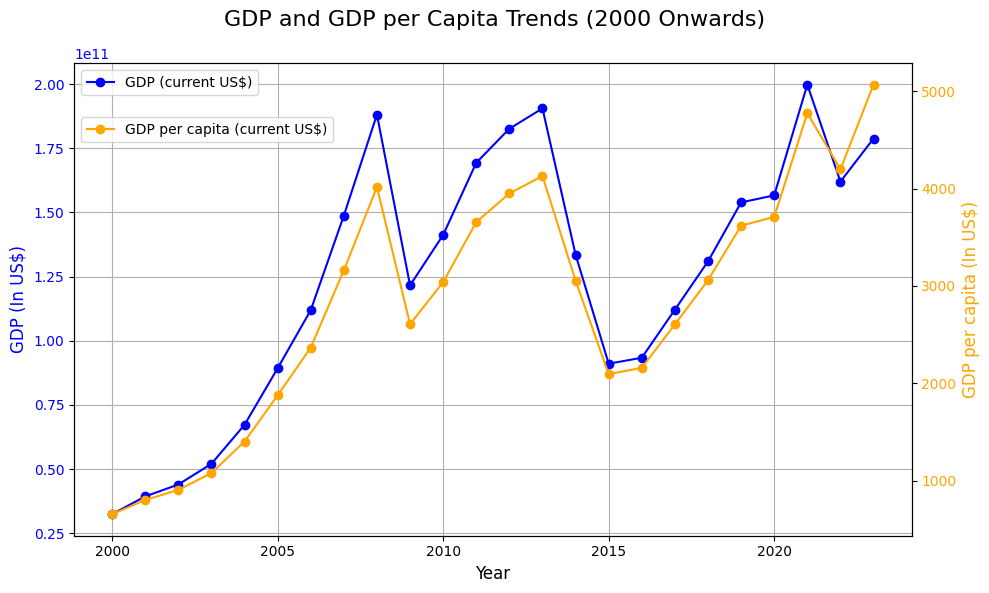

In [ ]:

# Select the GDP indicator from the indicator list on the website and extract the data
gdp_data = data[data['Indicator Name'] == 'GDP (current US$)']
per_capita_data = data[data['Indicator Name'] == "GDP per capita (current US$)"]

def melt_function(data):
    """
    A function that accepts data in a wide format and converts it to a long format

    param data: data in wide format to convert to a long format
    return data_long: data converted to a long format
    """
    result = data.melt(var_name="Year", value_name="GDP")
    return result

def data_prep(data_long):
    data_long = data_long[4:]
    data_long = data_long.dropna(subset=['Year', 'GDP'])
    data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
    data_long = data_long[data_long['Year'] >= 2000]
    return data_long

# Convert the data from the wide formatting to long formatting for plotting 
gdp_data_long = melt_function(gdp_data)
per_capita_data_long = melt_function(per_capita_data)

gdp_data_long = data_prep(gdp_data_long)
per_capita_data_long = data_prep(per_capita_data_long)


fig, ax1 = plt.subplots(figsize=(10, 6))
# Plot GDP on the left y-axis
ax1.plot(gdp_data_long['Year'], gdp_data_long['GDP'], color='blue', marker='o', label='GDP (current US$)')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('GDP (In US$)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a second y-axis for GDP per capita
ax2 = ax1.twinx()
ax2.plot(per_capita_data_long['Year'], per_capita_data_long['GDP'], color='orange', marker='o', label='GDP per capita (current US$)')
ax2.set_ylabel('GDP per capita (In US$)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a title and legends
fig.suptitle('GDP and GDP per Capita Trends (2000 Onwards)', fontsize=16)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# Place both legends in the upper left, with the second slightly offset
ax1.legend(lines1, labels1, loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(lines2, labels2, loc='upper left', bbox_to_anchor=(0, 0.9))

# Adjust layout and show the plot
fig.tight_layout()
plt.show()



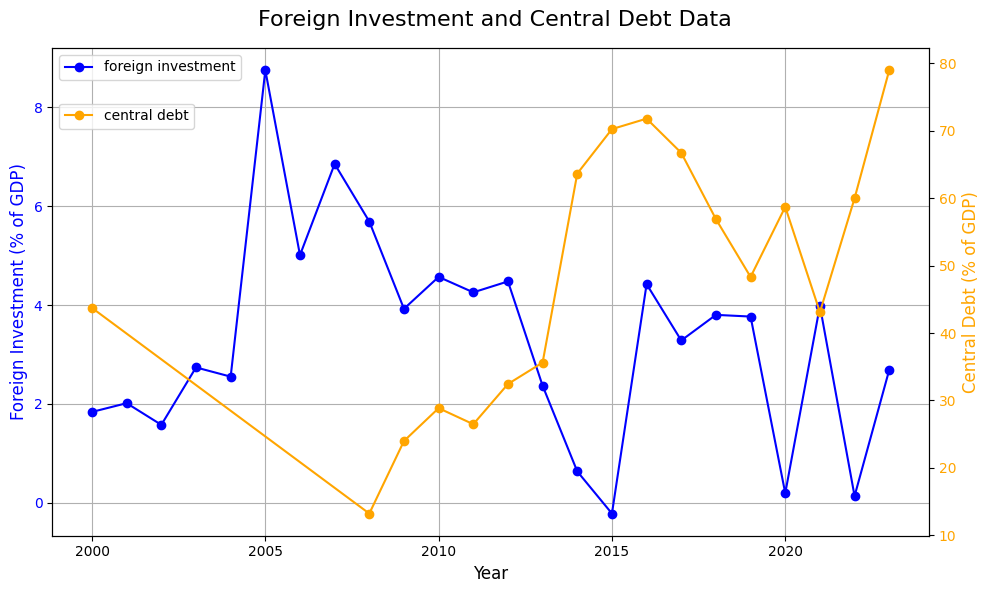

In [7]:
foreign_investment_data = data[data['Indicator Code'] == 'BX.KLT.DINV.WD.GD.ZS']
foreign_investment_data_long = melt_function(foreign_investment_data)
foreign_investment_data_long = data_prep(foreign_investment_data_long)

central_debt = data[data['Indicator Code'] == 'GC.DOD.TOTL.GD.ZS']
central_debt_long = melt_function(central_debt)
central_debt_long = data_prep(central_debt_long)

new_data = pd.DataFrame({
    'Year': [2021, 2022, 2023],  
    'GDP': [43.1, 60, 79]   
})

# Append the new data to the existing DataFrame
central_debt_long = pd.concat([central_debt_long, new_data], ignore_index=True)

central_debt_long = central_debt_long.sort_values(by='Year').reset_index(drop=True)

fig2, ax21 = plt.subplots(figsize=(10, 6))
# Plot GDP on the left y-axis
ax21.plot(foreign_investment_data_long['Year'], foreign_investment_data_long['GDP'], color='blue', marker='o', label='foreign investment')
ax21.set_xlabel('Year', fontsize=12)
ax21.set_ylabel('Foreign Investment (% of GDP)', fontsize=12, color='blue')
ax21.tick_params(axis='y', labelcolor='blue')
ax21.grid(True)

# Create a second y-axis for GDP per capita
ax22 = ax21.twinx()
ax22.plot(central_debt_long['Year'], central_debt_long['GDP'], color='orange', marker='o', label='central debt')
ax22.set_ylabel('Central Debt (% of GDP)', fontsize=12, color='orange')
ax22.tick_params(axis='y', labelcolor='orange')

# Add a title and legends
fig2.suptitle('Foreign Investment and Central Debt Data', fontsize=16)

# Add legends
lines3, labels3 = ax21.get_legend_handles_labels()
lines4, labels4 = ax22.get_legend_handles_labels()

# Place both legends in the upper left, with the second slightly offset
ax21.legend(lines3, labels3, loc='upper left', bbox_to_anchor=(0, 1))
ax22.legend(lines4, labels4, loc='upper left', bbox_to_anchor=(0, 0.9))

# Adjust layout and show the plot
fig2.tight_layout()
plt.show()

In [21]:
# Combine indicators into a single DataFrame
combined_data = foreign_investment_data_long.merge(central_debt_long, on='Year', suffixes=('_investment', '_debt'))

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

print("Correlation Matrix:\n", correlation_matrix)
print(combined_data)

Correlation Matrix:
                     Year  GDP_investment  GDP_debt
Year            1.000000       -0.257296  0.616732
GDP_investment -0.257296        1.000000 -0.576594
GDP_debt        0.616732       -0.576594  1.000000
    Year GDP_investment   GDP_debt
0   2000       1.837833  43.729787
1   2008       5.688149  13.229954
2   2009       3.923419  23.990034
3   2010         4.5684  28.866637
4   2011        4.25609   26.48082
5   2012       4.477201  32.445912
6   2013       2.366944    35.6314
7   2014       0.634439  63.665319
8   2015      -0.217508  70.258838
9   2016       4.421789  71.809545
10  2017       3.283061  66.734647
11  2018        3.80087  56.905951
12  2019       3.766497   48.32727
13  2020       0.194103  58.716185
14  2021       3.981661       43.1
15  2022       0.136429       60.0
16  2023       2.688006       79.0


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np


X = combined_data['GDP_debt'].values.reshape(-1, 1)
y = combined_data['GDP_investment'].values

model = LinearRegression()
model.fit(X, y)

print(f"Intercept: {model.intercept_}, Coefficient: {model.coef_[0]}")

Intercept: 5.536097991043062, Coefficient: -0.053842140495369215


In [ ]:
from scipy.stats import ttest_ind

def select_data(df, year_column, pivot_year):
    """
    select_data function that splits the dataset into before and after a pivot year

    Parameters:
        :param df: data frame
        :param year_column: identifier for the column name accessed 
        :param pivot_year: year to be pivoted in

    Return:
        :return pre_war: a sliced dataset before war
        :war: a sliced dataset after war
    """
    # Slice the dataset on the pivot year
    pre_war = df[df[year_column] < pivot_year]
    war = df[df[year_column] >= pivot_year]

    # Return both sliced frame
    return pre_war, war

def indicator_data(name, pre_war, war):
    """
    indicator_data function that drops empty values and converts the required subset to numeric format

    Parameters:
        :param name: name of the indicator
        :param pre_war: period before pivot
        :param war: period after pivot

    Return:
        pre_war, war: cleaned subsets

    """
    pre_war = pre_war.dropna(subset=[name])
    war = war.dropna(subset=[name])

    pre_war[name] = pd.to_numeric(pre_war[name], errors='coerce')
    war[name] = pd.to_numeric(war[name], errors='coerce')

    return pre_war, war

# Pivot year 
pivot_year = 2014
pre_war, war = select_data(combined_data, 'Year', pivot_year)

indicators = ['GDP_investment', 'GDP_debt']
for indicator in indicators:
    pre_war, war = indicator_data(indicator, pre_war, war)
    
# Perform an independent t-test
t_stat, p_value = ttest_ind(pre_war['GDP_investment'], war['GDP_investment'], equal_var=False)
t_stat2, p_value2 = ttest_ind(pre_war['GDP_debt'], war['GDP_debt'], equal_var=False)
print(f"Independent T-Test Investment:\nT-Statistic: {t_stat}, P-Value: {p_value}")
print(f"Independent T-Test Debt:\nT-Statistic: {t_stat2}, P-Value: {p_value2}")

Independent T-Test Investment:
T-Statistic: 2.0720817067834, P-Value: 0.055956495347834874
Independent T-Test Debt:
T-Statistic: -6.534481963541312, P-Value: 1.2986805850820036e-05
